In [2]:
import numpy as np
import math
import random as rn
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import sys
import pandas as pd

### Data creating

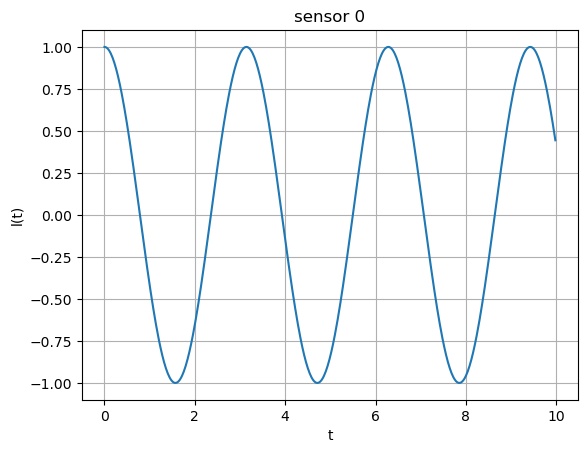

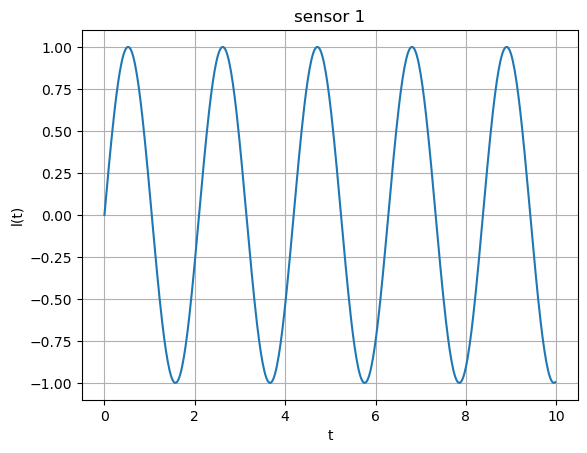

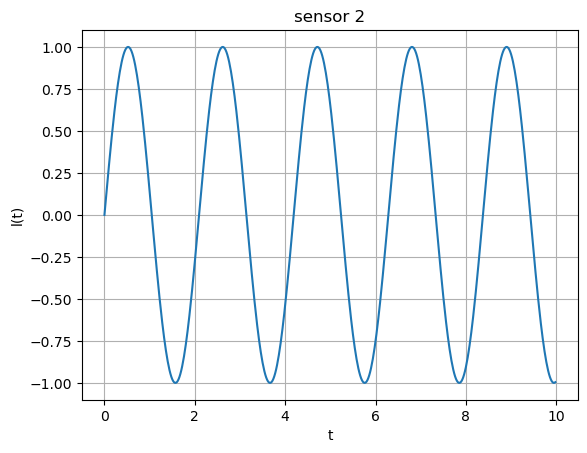

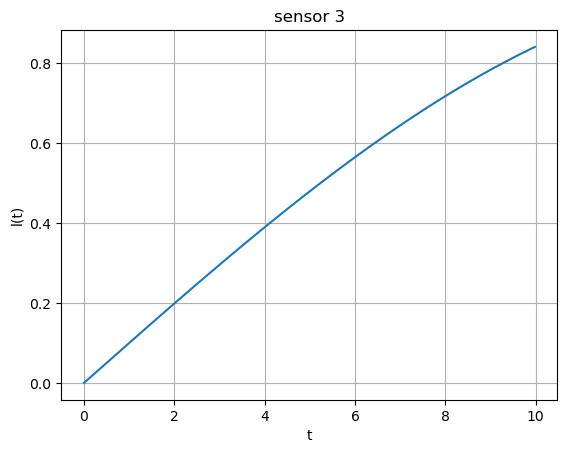

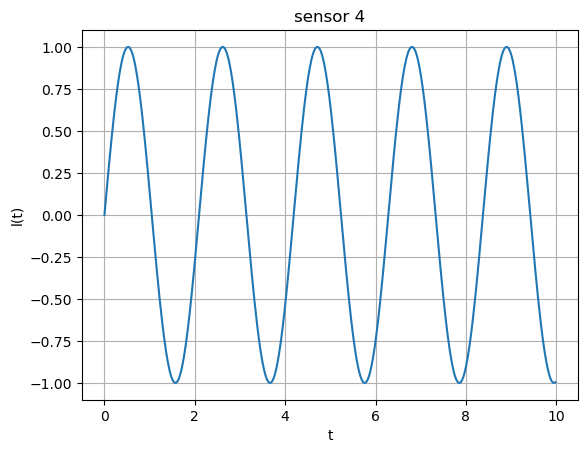

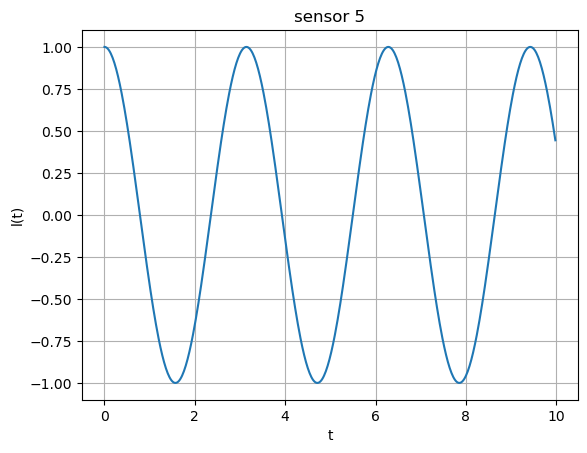

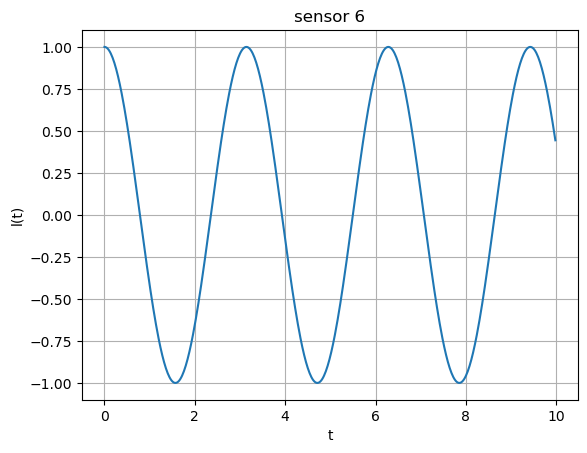

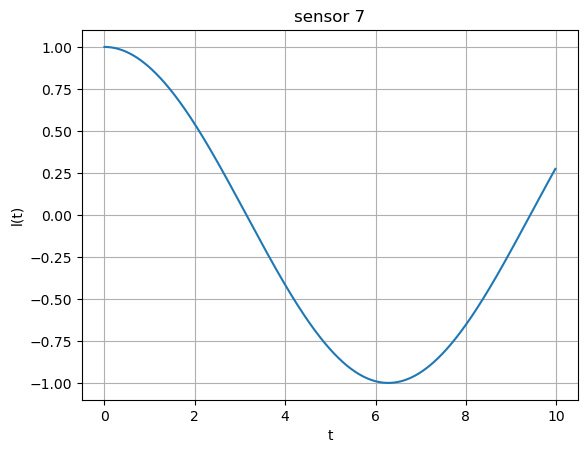

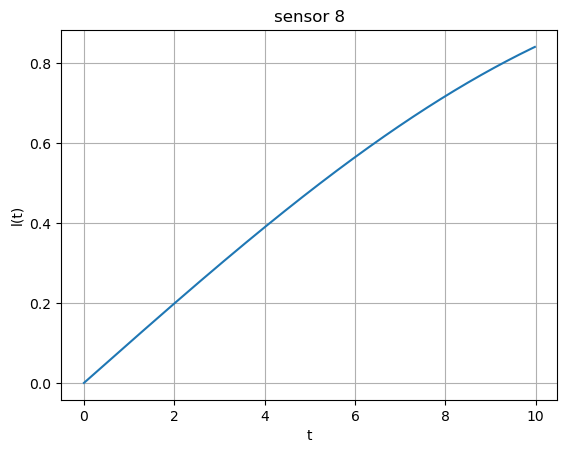

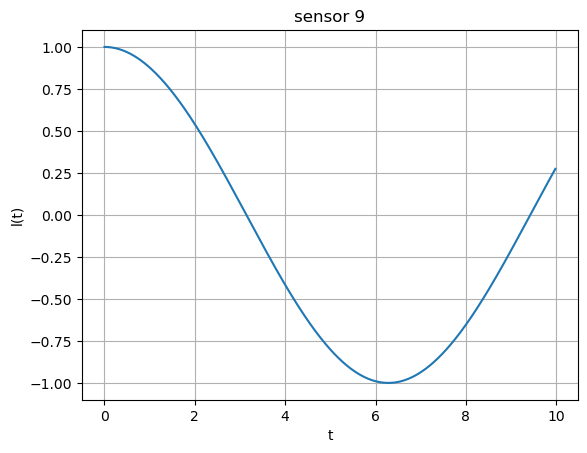

<Figure size 640x480 with 0 Axes>

In [4]:
#в ручную формирую данные сенсоров
sen_num = 10
t = np.arange(0, 10, 0.02)
l1 = lambda t: np.cos(2*t)
l2 = lambda t: np.sin(3*t)
l3 = lambda t: np.cos(0.5*t)
l4 = lambda t: np.sin(.1*t)
f_sp = {}
f_sp[0] = l1(t)
f_sp[1] = l2(t)
f_sp[2] = l2(t)
f_sp[3] = l4(t)
f_sp[4] = l2(t)
f_sp[5] = l1(t)
f_sp[6] = l1(t)
f_sp[7] = l3(t)
f_sp[8] = l4(t)
f_sp[9] = l3(t)
for i in range(sen_num):
    plt.grid(True)
    plt.title(f'sensor {i}')
    plt.xlabel('t')
    plt.ylabel('l(t)')
    plt.plot(t, f_sp[i]);
    plt.figure()

In [322]:
#cоздаю общий датафрейм
df_geo = pd.DataFrame(data = f_sp[0], columns=['sensor_0'])
for i in range(1, sen_num):
    df_geo[f'sensor_{i}'] = pd.Series(f_sp[i])
print('Количество данных:', df_geo.shape)
df_geo.head()

Количество данных: (500, 10)


,sensor_0,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9
0,1.000000,0.000000,0.000000,0.000,0.000000,1.000000,1.000000,1.00000,0.000,1.00000
1,0.999200,0.059964,0.059964,0.002,0.059964,0.999200,0.999200,0.99995,0.002,0.99995
2,0.996802,0.119712,0.119712,0.004,0.119712,0.996802,0.996802,0.99980,0.004,0.99980
3,0.992809,0.179030,0.179030,0.006,0.179030,0.992809,0.992809,0.99955,0.006,0.99955
4,0.987227,0.237703,0.237703,0.008,0.237703,0.987227,0.987227,0.99920,0.008,0.99920


### Creating corr matrix

In [323]:
#матрица кореляции
corr1 = df_geo.corr()
corr1.style.background_gradient(cmap='coolwarm')

,sensor_0,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9
sensor_0,1.000000,0.181136,0.181136,0.084865,0.181136,1.000000,1.000000,0.060995,0.084865,0.060995
sensor_1,0.181136,1.000000,1.000000,-0.099667,1.000000,0.181136,0.181136,0.070988,-0.099667,0.070988
sensor_2,0.181136,1.000000,1.000000,-0.099667,1.000000,0.181136,0.181136,0.070988,-0.099667,0.070988
sensor_3,0.084865,-0.099667,-0.099667,1.000000,-0.099667,0.084865,0.084865,-0.707586,1.000000,-0.707586
sensor_4,0.181136,1.000000,1.000000,-0.099667,1.000000,0.181136,0.181136,0.070988,-0.099667,0.070988
sensor_5,1.000000,0.181136,0.181136,0.084865,0.181136,1.000000,1.000000,0.060995,0.084865,0.060995
sensor_6,1.000000,0.181136,0.181136,0.084865,0.181136,1.000000,1.000000,0.060995,0.084865,0.060995
sensor_7,0.060995,0.070988,0.070988,-0.707586,0.070988,0.060995,0.060995,1.000000,-0.707586,1.000000
sensor_8,0.084865,-0.099667,-0.099667,1.000000,-0.099667,0.084865,0.084865,-0.707586,1.000000,-0.707586
sensor_9,0.060995,0.070988,0.070988,-0.707586,0.070988,0.060995,0.060995,1.000000,-0.707586,1.000000


## Temporal clustering each sensor

In [324]:
#example of partitioning data of sensor_0 each delta values 
#and creating corr matrix
delta = 25
t = delta
k = 1
data_temp = pd.DataFrame(data = df_geo['sensor_0'].values[:delta], columns=[0])
for i in range(df_geo.shape[0]//delta-1):
    data_temp[k] = pd.Series(data = df_geo['sensor_0'].values[t:t+delta])
    t+=delta
    k+=1
display(data_temp)
data_temp.corr().style.background_gradient(cmap='coolwarm')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.000000,0.540302,-0.416147,-0.989992,-0.653644,0.283662,0.960170,0.753902,-0.145500,-0.911130,-0.839072,0.004426,0.843854,0.907447,0.136737,-0.759688,-0.957659,-0.275163,0.660317,0.988705
1,0.999200,0.506220,-0.452176,-0.994844,-0.622857,0.321782,0.970576,0.727027,-0.184947,-0.926882,-0.816645,0.044411,0.864636,0.889919,0.097014,-0.785085,-0.945380,-0.236498,0.689820,0.981920
2,0.996802,0.471328,-0.487482,-0.998104,-0.591073,0.359387,0.979429,0.698988,-0.224099,-0.941151,-0.792913,0.084325,0.884035,0.870967,0.057136,-0.809226,-0.931589,-0.197453,0.718220,0.973565
3,0.992809,0.435682,-0.522008,-0.999767,-0.558345,0.396417,0.986715,0.669831,-0.262892,-0.953914,-0.767911,0.124105,0.902020,0.850622,0.017166,-0.832072,-0.916307,-0.158094,0.745470,0.963652
4,0.987227,0.399340,-0.555699,-0.999831,-0.524722,0.432813,0.992422,0.639603,-0.301264,-0.965151,-0.741682,0.163686,0.918561,0.828916,-0.022831,-0.853587,-0.899559,-0.118481,0.771529,0.952198
5,0.980067,0.362358,-0.588501,-0.998295,-0.490261,0.468517,0.996542,0.608351,-0.339155,-0.974844,-0.714266,0.203005,0.933634,0.805884,-0.062792,-0.873737,-0.881372,-0.078678,0.796352,0.939220
6,0.971338,0.324796,-0.620362,-0.995162,-0.455015,0.503471,0.999068,0.576126,-0.376503,-0.982977,-0.685707,0.241999,0.947212,0.781563,-0.102652,-0.892489,-0.861776,-0.038750,0.819902,0.924740
7,0.961055,0.286715,-0.651230,-0.990437,-0.419041,0.537619,0.999995,0.542980,-0.413248,-0.989538,-0.656051,0.280606,0.959275,0.755991,-0.142348,-0.909813,-0.840800,0.001240,0.842141,0.908781
8,0.949235,0.248175,-0.681056,-0.984128,-0.382397,0.570908,0.999322,0.508965,-0.449333,-0.994516,-0.625346,0.318765,0.969804,0.729210,-0.181816,-0.925681,-0.818480,0.041229,0.863031,0.891367
9,0.935897,0.209239,-0.709793,-0.976244,-0.345141,0.603283,0.997051,0.474135,-0.484698,-0.997903,-0.593640,0.356413,0.978781,0.701263,-0.220994,-0.940069,-0.794850,0.081151,0.882542,0.872528


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.000000,0.973162,0.917540,-0.994081,-0.977330,-0.932891,0.945264,0.981399,0.943604,-0.602901,-0.985469,-0.951689,-0.338145,0.989603,0.958177,0.729304,-0.993773,-0.963654,-0.843567,0.997673
1,0.973162,1.000000,0.984421,-0.942400,-0.999822,-0.990734,0.844805,0.999239,0.994467,-0.403125,-0.998108,-0.996809,-0.545636,0.996142,0.998317,0.867178,-0.992743,-0.999269,-0.944508,0.986587
2,0.917540,0.984421,1.000000,-0.868907,-0.980929,-0.999180,0.737564,0.976812,0.997445,-0.235939,-0.971749,-0.995315,-0.684482,0.965192,0.992962,0.941230,-0.956134,-0.990423,-0.987551,0.942516
3,-0.994081,-0.942400,-0.868907,1.000000,0.948542,0.888239,-0.975120,-0.954732,-0.902048,0.686010,0.961182,0.912695,0.233899,-0.968119,-0.921414,-0.650654,0.975785,0.928925,0.780229,-0.984360
4,-0.977330,-0.999822,-0.980929,0.948542,1.000000,0.987996,-0.854748,-0.999797,-0.992309,0.420316,0.999090,0.995126,0.529731,-0.997620,-0.997045,-0.857630,0.994835,0.998370,0.938144,-0.989491
5,-0.932891,-0.990734,-0.999180,0.888239,0.987996,1.000000,-0.764306,-0.984681,-0.999520,0.275099,0.980510,0.998414,0.654397,-0.974992,-0.996943,-0.926779,0.967212,0.995202,0.980370,-0.955276
6,0.945264,0.844805,0.737564,-0.975120,-0.854748,-0.764306,1.000000,0.865037,0.783923,-0.830232,-0.876104,-0.799401,-0.012553,0.888504,0.812350,0.466131,-0.903019,-0.823734,-0.622160,0.920817
7,0.981399,0.999239,0.976812,-0.954732,-0.999797,-0.984681,0.865037,1.000000,0.989612,-0.438521,-0.999747,-0.992937,-0.512527,0.998807,0.995294,0.847090,-0.996679,-0.997017,-0.930974,0.992204
8,0.943604,0.994467,0.997445,-0.902048,-0.992309,-0.999520,0.783923,0.989612,1.000000,-0.304760,-0.986127,-0.999679,-0.630650,0.981411,0.998886,0.914694,-0.974618,-0.997756,-0.973789,0.963981
9,-0.602901,-0.403125,-0.235939,0.686010,0.420316,0.275099,-0.830232,-0.438521,-0.304760,1.000000,0.458626,0.328793,-0.546952,-0.481884,-0.349371,0.106159,0.510249,0.367848,0.080141,-0.547102


In [325]:
temp_clust = []
for s in range(df_geo.shape[1]):
    delta = 25
    t = delta
    k = 1
    data_temp = pd.DataFrame(data = df_geo[f'sensor_{s}'].values[:delta], columns=[0])
    for i in range(df_geo.shape[0]//delta-1):
        data_temp[k] = pd.Series(data = df_geo[f'sensor_{s}'].values[t:t+delta])
        t+=delta
        k+=1
    
    cl2 = {} #все кластеры c повторениями
    for i in range(data_temp.shape[1]):
        x = []
        for j in range(data_temp.shape[1]):
            if i!=j:
                cor = data_temp[i].corr(data_temp[j])
                if cor>0.8:
                    x.append(j)
        cl2[i] = x
#print(cl2)    
    other = []
    for i in range(len(cl2)):
        if len(cl2[i])<1:
            other.append(i)
#print(other)
    cl_t = {} # совпадают 
    k=0
    a = np.arange(data_temp.shape[1])
    for i in range(data_temp.shape[1]):
        x = []
        for j in range(i+1, data_temp.shape[1]):
            if (i!=j) and (a[j]>=0):
                cor = data_temp[i].corr(data_temp[j])
                if cor>0.8:
                    x.append(j)
                    a[j] = -1
        if len(x)>0:
            x.append(i)
            cl_t[k] = x
            k+=1
    cl_t[k] = other
    temp_clust.append(cl_t)

for i in range(len(temp_clust)):
    print(f'sensor_{i}:')
    print(temp_clust[i])


sensor_0:
{0: [1, 2, 6, 7, 8, 13, 14, 19, 0], 1: [15, 1], 2: [4, 5, 10, 11, 16, 17, 3], 3: [18, 4], 4: [9, 12]}
sensor_1:
{0: [3, 4, 8, 12, 13, 16, 17, 0], 1: [2, 5, 6, 10, 14, 18, 19, 1], 2: [15, 2], 3: [7, 3], 4: [9, 11]}
sensor_2:
{0: [3, 4, 8, 12, 13, 16, 17, 0], 1: [2, 5, 6, 10, 14, 18, 19, 1], 2: [15, 2], 3: [7, 3], 4: [9, 11]}
sensor_3:
{0: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 0], 1: []}
sensor_4:
{0: [3, 4, 8, 12, 13, 16, 17, 0], 1: [2, 5, 6, 10, 14, 18, 19, 1], 2: [15, 2], 3: [7, 3], 4: [9, 11]}
sensor_5:
{0: [1, 2, 6, 7, 8, 13, 14, 19, 0], 1: [15, 1], 2: [4, 5, 10, 11, 16, 17, 3], 3: [18, 4], 4: [9, 12]}
sensor_6:
{0: [1, 2, 6, 7, 8, 13, 14, 19, 0], 1: [15, 1], 2: [4, 5, 10, 11, 16, 17, 3], 3: [18, 4], 4: [9, 12]}
sensor_7:
{0: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 0], 1: [14, 15, 16, 17, 18, 19, 13], 2: [12]}
sensor_8:
{0: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 0], 1: []}
sensor_9:
{0: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 

In [326]:
s = 0
for i in range(len(temp_clust)):
    a = 112*len(temp_clust[i])
    for j in range(len(temp_clust[i])):
        b = np.array(np.arange(len(temp_clust[i][j])-1))
        a+=sys.getsizeof(b)
    s += a
    print('Размер delta*(количество временных кластеров для данного сенсора) значений:', a)
print('Такой размер данных получится в результате temporal clustering:', s)

Размер delta*(количество временных кластеров для данного сенсора) значений: 1256
Размер delta*(количество временных кластеров для данного сенсора) значений: 1256
Размер delta*(количество временных кластеров для данного сенсора) значений: 1256
Размер delta*(количество временных кластеров для данного сенсора) значений: 600
Размер delta*(количество временных кластеров для данного сенсора) значений: 1256
Размер delta*(количество временных кластеров для данного сенсора) значений: 1256
Размер delta*(количество временных кластеров для данного сенсора) значений: 1256
Размер delta*(количество временных кластеров для данного сенсора) значений: 808
Размер delta*(количество временных кластеров для данного сенсора) значений: 600
Размер delta*(количество временных кластеров для данного сенсора) значений: 808
Такой размер данных получится в результате temporal clustering: 10352


## Рассмотрим зависимость от местоположения

sensor_0: [3.9393762826279075, 5.635207822918204]
sensor_1: [3.6890254938009597, 2.727829350624886]
sensor_2: [4.389652740696987, 2.1319338618776635]
sensor_3: [0.32685469863002936, 3.732889364217453]
sensor_4: [3.1396296301894537, 2.0256250642068334]
sensor_5: [4.793592757488165, 4.168070290631798]
sensor_6: [5.025632947910681, 4.127267706095469]
sensor_7: [2.6761766241414264, 2.5738915301503034]
sensor_8: [5.830301525401946, 2.2525694434283743]
sensor_9: [1.6595055774113219, 3.071449207388172]


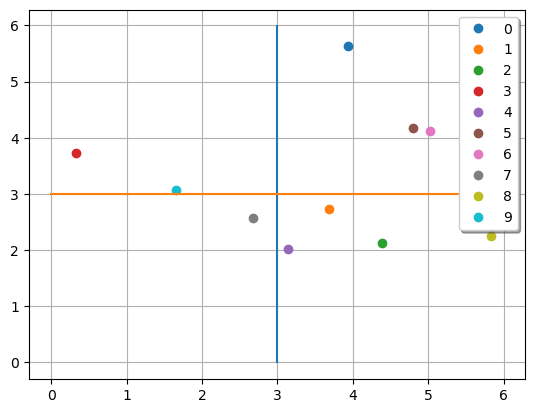

In [215]:
#сгенерируем геоданные для 10 сенсоров
sen_num = 10
x_y = []
for i in range(sen_num):
    x_y.append([rn.uniform(.0, 6.0), rn.uniform(.0, 6.0)])
    print(f'sensor_{i}:', x_y[i])

plt.grid(True)
for i in range(len(x_y)):
    plt.plot(x_y[i][0], x_y[i][1], 'o', label = i)
    plt.legend(loc = 'best', fancybox = True, shadow = True)

plt.plot(3*np.ones(300), np.arange(0, 6, 0.02))
plt.plot(np.arange(0, 6, 0.02), 3*np.ones(300))

In [327]:
#функция сортировки по удаленности сенсеров с номерами в массиве а от сенсора s
def geo_sort(x_y, a, s)->np.array:
    xy_dot = {}
    for i in a:
        if i !=s:
            vp = math.dist(x_y[s], x_y[i])
            xy_dot[vp] = i
    xy_dot_sort = dict(sorted(xy_dot.items()))
    x_y_ind = []
    for l in xy_dot_sort.keys():
        x_y_ind.append(xy_dot_sort[l])
    print(f'Cенсоры в зависимости от их удаленности от сенсора {s}:', x_y_ind)
    return x_y_ind

In [328]:
#функция кластеризации в зависимости геоданных
cl_sp = {}#cписок кластеров
cor_lvl = 0.8#c каким коэфициентом кореляции сравниваем
cl_ind = 0#от какого сенсора ищем ближайшие
x = []#набираем в кластер
cl_num = -1#номер текущего кластера
a = list(np.arange(sen_num))#сенсоры
x_y_ind = []
x_y_ind = geo_sort(x_y, a, cl_ind)

#идем по удаленности от сенсора 0
while len(a)!=0:
    x = []
    cl_num+=1
    #print('a',a)
    #print('x_y_ind',x_y_ind)
    #print(cl_ind)
    if len(x_y_ind)==0:
        cl_sp[cl_num] = [cl_ind]
        break
    for i in x_y_ind:
        cor = df_geo[f'sensor_{cl_ind}'].corr(df_geo[f'sensor_{i}'])
        if cor>cor_lvl:
            x.append(i)
            a.remove(i)
        
        else:
            x.append(cl_ind)
            a.remove(cl_ind)
            cl_sp[cl_num] = x
            #print(cl_sp)
            cl_ind = i
            x_y_ind = geo_sort(x_y, a, cl_ind)
            break
        if len(a)==1:
            x.append(cl_ind)
            cl_sp[cl_num] = x
            a.remove(cl_ind)
            break
            
print('Кластеры:', cl_sp)                    
    

Cенсоры в зависимости от их удаленности от сенсора 0: [5, 6, 1, 7, 9, 2, 4, 8, 3]
Cенсоры в зависимости от их удаленности от сенсора 1: [4, 2, 7, 9, 8, 3]
Cенсоры в зависимости от их удаленности от сенсора 7: [9, 3, 8]
Cенсоры в зависимости от их удаленности от сенсора 3: [8]
Кластеры: {0: [5, 6, 0], 1: [4, 2, 1], 2: [9, 7], 3: [8, 3]}


In [329]:
#создадим датафрейм, в который войдут данные одного сенсора из каждого кластера
df_clust = pd.DataFrame(data = df_geo[f'sensor_{cl_sp[0][-1]}'].values, columns=['cluster_0'])
for i in range(1, len(cl_sp)):
    df_clust[f'cluster_{i}'] = df_geo[f'sensor_{cl_sp[i][-1]}']
print('Количество данных:', df_clust.shape)
df_clust.head()

Количество данных: (500, 4)


,cluster_0,cluster_1,cluster_2,cluster_3
0,1.000000,0.000000,1.00000,0.000
1,0.999200,0.059964,0.99995,0.002
2,0.996802,0.119712,0.99980,0.004
3,0.992809,0.179030,0.99955,0.006
4,0.987227,0.237703,0.99920,0.008


In [330]:
size_df = 0
for i in range(len(cl_sp)):
    size_df+=sys.getsizeof(df_clust[f'cluster_{i}'])
print('Такой размер данных получится в результате spatial clustering:', size_df)

Такой размер данных получится в результате spatial clustering: 16656


## Применим к кластеризованным данным кластеризацию по времени

In [331]:
temp_clust = []
for s in range(df_clust.shape[1]):
    delta = 25
    t = delta
    k = 1
    data_temp = pd.DataFrame(data = df_clust[f'cluster_{s}'].values[:delta], columns=[0])
    for i in range(df_clust.shape[0]//delta-1):
        data_temp[k] = pd.Series(data = df_clust[f'cluster_{s}'].values[t:t+delta])
        t+=delta
        k+=1
    
    cl2 = {} #все кластеры c повторениями
    for i in range(data_temp.shape[1]):
        x = []
        for j in range(data_temp.shape[1]):
            if i!=j:
                cor = data_temp[i].corr(data_temp[j])
                if cor>0.8:
                    x.append(j)
        cl2[i] = x
#print(cl2)    
    other = []
    for i in range(len(cl2)):
        if len(cl2[i])<1:
            other.append(i)
#print(other)
    cl_t = {} # совпадают 
    k=0
    a = np.arange(data_temp.shape[1])
    for i in range(data_temp.shape[1]):
        x = []
        for j in range(i+1, data_temp.shape[1]):
            if (i!=j) and (a[j]>=0):
                cor = data_temp[i].corr(data_temp[j])
                if cor>0.8:
                    x.append(j)
                    a[j] = -1
        if len(x)>0:
            x.append(i)
            cl_t[k] = x
            k+=1
    cl_t[k] = other
    temp_clust.append(cl_t)

for i in range(len(temp_clust)):
    print(f'cluster_{i}:')
    print(temp_clust[i])


cluster_0:
{0: [1, 2, 6, 7, 8, 13, 14, 19, 0], 1: [15, 1], 2: [4, 5, 10, 11, 16, 17, 3], 3: [18, 4], 4: [9, 12]}
cluster_1:
{0: [3, 4, 8, 12, 13, 16, 17, 0], 1: [2, 5, 6, 10, 14, 18, 19, 1], 2: [15, 2], 3: [7, 3], 4: [9, 11]}
cluster_2:
{0: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 0], 1: [14, 15, 16, 17, 18, 19, 13], 2: [12]}
cluster_3:
{0: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 0], 1: []}


## Сравнение результатов


In [332]:
size_df = 0
for i in range(sen_num):
    size_df+=sys.getsizeof(df_geo[f'sensor_{i}'])
print('Весь объем данных:', size_df)

Весь объем данных: 41640


Для каждого сенсора будем передавать delta*(количество временных кластеров для данного сенсора) значений, temp_clust и (df_clust.shape[0]//delta-1) - (количество временных кластеров для данного сенсора) значений

In [333]:
sys.getsizeof(df_clust['cluster_0'].values[:delta])
#объем 25 значений

112

In [335]:
s = 0
for i in range(len(temp_clust)):
    a = 112*len(temp_clust[i])
    for j in range(len(temp_clust[i])):
        b = np.array(np.arange(len(temp_clust[i][j])-1))
        a+=sys.getsizeof(b)
    s += a
    print('Размер delta*(количество временных кластеров для данного сенсора) значений:', a)
print('Такой размер данных получится в результате spatial and temporal clustering:', s)

Размер delta*(количество временных кластеров для данного сенсора) значений: 1256
Размер delta*(количество временных кластеров для данного сенсора) значений: 1256
Размер delta*(количество временных кластеров для данного сенсора) значений: 808
Размер delta*(количество временных кластеров для данного сенсора) значений: 600
Такой размер данных получится в результате spatial and temporal clustering: 3920
